# Task 1

## Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Load the datasets

In [3]:
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

## Display the first few rows of each dataset


In [4]:
print("Customers Data:")
print(customers.head())
print("\nProducts Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

## Check for missing values


In [5]:
print("\nMissing Values in Customers:")
print(customers.isnull().sum())
print("\nMissing Values in Products:")
print(products.isnull().sum())
print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


## Convert date columns to datetime


In [6]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

## EDA: Distribution of customers across regions

<ipython-input-7-cbc3934b4a65>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


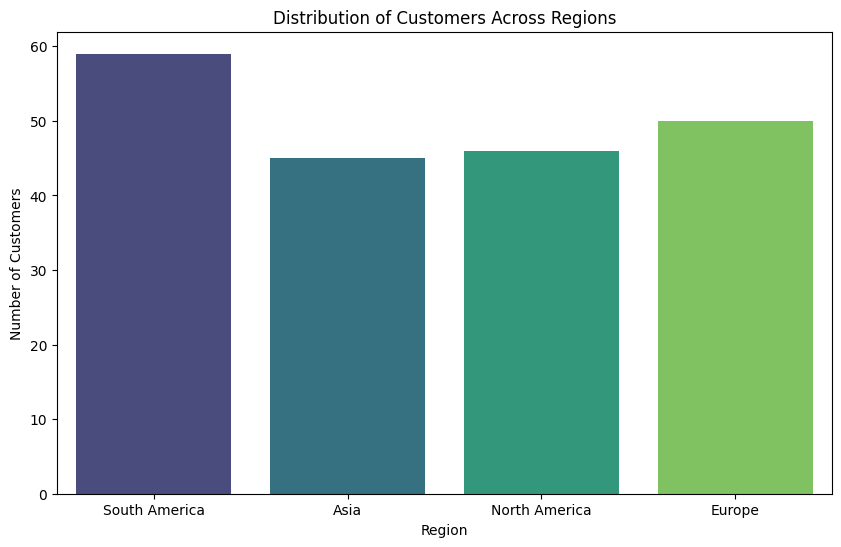

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title("Distribution of Customers Across Regions")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

## EDA: Distribution of product categories


<ipython-input-8-dfc53d54e666>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x='Category', palette='magma')


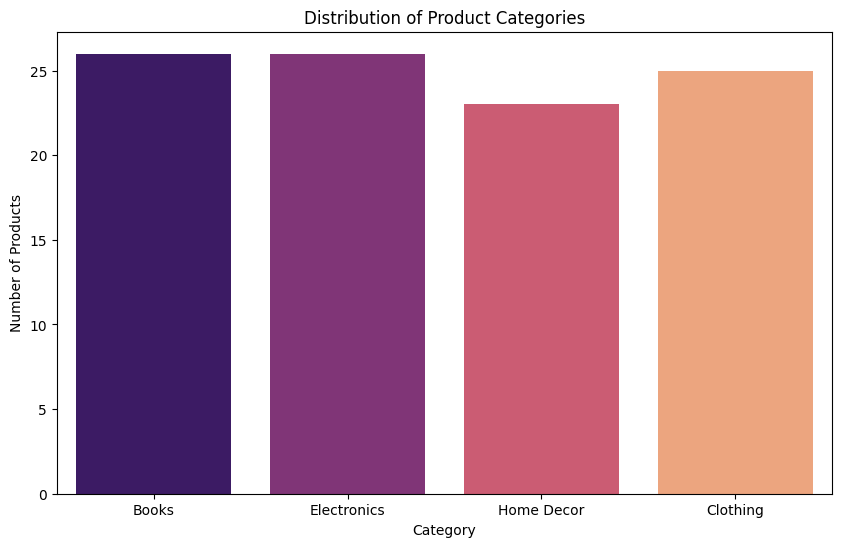

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=products, x='Category', palette='magma')
plt.title("Distribution of Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

## EDA: Total sales over time


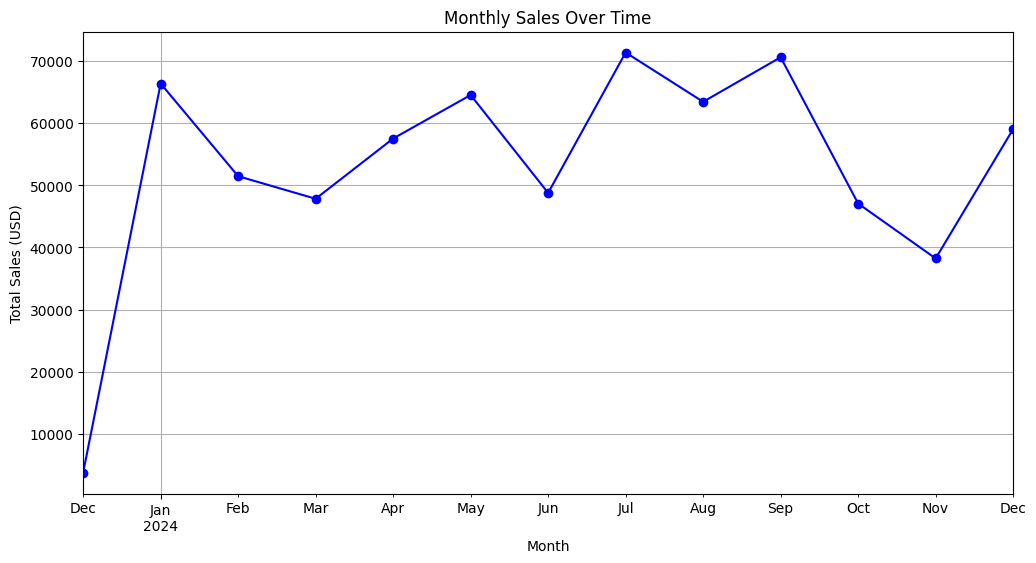

In [9]:
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('TransactionMonth')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()

## EDA: Top 10 customers by total spending


<ipython-input-10-dbb1b7831f2e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='CustomerID', y='TotalValue', palette='coolwarm')


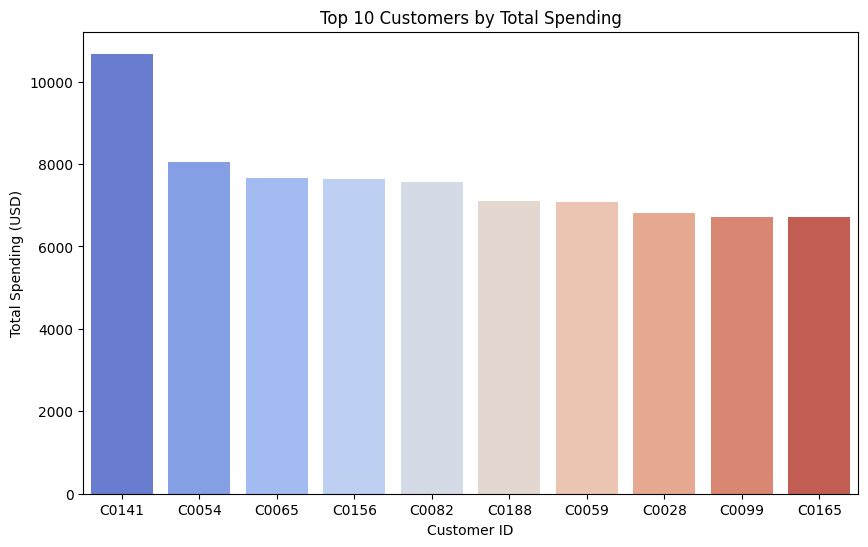

In [10]:
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
top_customers = customer_spending.sort_values(by='TotalValue', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='CustomerID', y='TotalValue', palette='coolwarm')
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Spending (USD)")
plt.show()

## EDA: Top 10 products by quantity sold


<ipython-input-11-c6431128d48b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='ProductID', y='Quantity', palette='plasma')


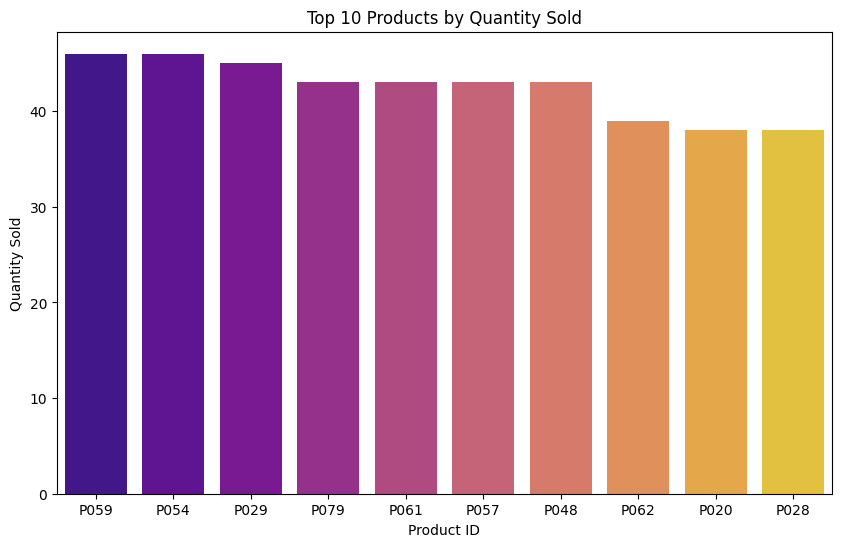

In [11]:
product_sales = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
top_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='ProductID', y='Quantity', palette='plasma')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product ID")
plt.ylabel("Quantity Sold")
plt.show()